## Import Packages

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import wget
import itertools
import timeit
import pygrib

import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd
import matplotlib.pyplot as plt

import datetime
from datetime import datetime
from datetime import timedelta

from datablock import *
from dataform import *

datadir = '/home/q1park/mesocyclones/data_outbreaks/'

/home/q1park/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
events = pd.read_csv(datadir + 'list_outbreaks.csv', dtype = str, index_col = 0)
events['start'] = events['start'].apply(lambda x: str2dt(x))
events['end'] = events['end'].apply(lambda x: str2dt(x))
events

,start,end
OB001,2018-04-13 00:00:00,2018-04-15 23:00:00
OB002,2017-05-14 22:00:00,2017-05-20 23:00:00
OB003,2017-04-28 00:00:00,2017-05-01 23:00:00
OB004,2017-03-06 00:00:00,2017-03-07 23:00:00
OB005,2017-02-28 00:00:00,2017-03-01 23:00:00
OB006,2017-02-07 00:00:00,2017-02-07 23:00:00
OB007,2017-01-21 00:00:00,2017-01-23 23:00:00
OB008,2016-11-27 00:00:00,2016-11-30 23:00:00
OB009,2016-08-24 00:00:00,2016-08-24 23:00:00
OB010,2016-05-22 00:00:00,2016-05-26 23:00:00


In [3]:
model = 'rucanl'
#tag = events.index[0]
tag = 'OBRIP'
folder = '%s%s_%s/' % (datadir, model, tag)

if not os.path.exists(folder):
    os.mkdir(folder)
else:
    print('folder already exists')
    
getmenu = gribmenu()
getmenu.createmenu(model, events.loc[tag])
getmenu.filtermenu(name='rap', res='130', fchr=0, ext='grb2')
getmenu.savemenu(folder + tag + '.gribmenu')

folder already exists


In [4]:
getmenu.menu

,name,res,datetime,fchr,ext,url
0,rap,130,2013-05-31 00:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
1,rap,130,2013-05-31 01:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
2,rap,130,2013-05-31 02:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
3,rap,130,2013-05-31 03:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
4,rap,130,2013-05-31 04:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
5,rap,130,2013-05-31 05:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
6,rap,130,2013-05-31 06:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
7,rap,130,2013-05-31 07:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
8,rap,130,2013-05-31 08:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
9,rap,130,2013-05-31 09:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...


In [5]:
obmenu = gribmenu()
obmenu.loadmenu(folder + tag + '.gribmenu')
obmenu.filtermenu(start=datetime(2013, 5, 31, 15), end=datetime(2013, 6, 1, 4))
obmenu.menu.head(3)
obmenu.menu.tail(3)

,name,res,datetime,fchr,ext,url
0,rap,130,2013-05-31 15:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
1,rap,130,2013-05-31 16:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
2,rap,130,2013-05-31 17:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...


,name,res,datetime,fchr,ext,url
11,rap,130,2013-06-01 02:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
12,rap,130,2013-06-01 03:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...
13,rap,130,2013-06-01 04:00:00,0,grb2,https://nomads.ncdc.noaa.gov/data/rucanl/20130...


In [6]:
for i, row in obmenu.menu.iterrows():
    file = obmenu.menuselect(datetime = row['datetime'] )
    
    if not os.path.exists(folder + file):
        wget.download(row['url'], folder) 
        #print(i, row['url'])
    else:
        if i%5==0:
            print('first ' + str(i) + ' files already in place')

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130531_1500_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130531_1600_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130531_1700_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130531_1800_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130531_1900_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130531_2000_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130531_2100_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130531_2200_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130531_2300_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130601_0000_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130601_0100_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130601_0200_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130601_0300_000.grb2'

'/home/q1park/mesocyclones/data_outbreaks/rucanl_OBRIP//rap_130_20130601_0400_000.grb2'

In [6]:
#obmenu.checklocal(checkdir = datadir)

In [7]:
#obmenu.filtermenu(start=datetime(2018, 4, 13, 18), end=datetime(2018, 4, 14, 4))
#obmenu.menu

In [8]:
gridbnd = np.array([[-110, -90], [30, 40]])
res = 0.0125

In [9]:
tms = wxblocks(gridbnd, res)
tms.grb2time(obmenu.menu, folder, ['cape0', 'cin0'])

finished  0 ,  14  to go
finished  2 ,  12  to go
finished  4 ,  10  to go
finished  6 ,  8  to go
finished  8 ,  6  to go
finished  10 ,  4  to go
finished  12 ,  2  to go


In [10]:
tms.blocks.loc[30:30.05]

datetime 2013-05-31 15:00:00                                          \
var                    cape0                                           
coord              -110.0000 -109.9875 -109.9750 -109.9625 -109.9500   
30.0000                  0.0       0.0       0.0       0.0       0.0   
30.0125                  0.0       0.0       0.0       0.0       0.0   
30.0250                  0.0       0.0       0.0       0.0       0.0   
30.0375                  0.0       0.0       0.0       0.0       0.0   
30.0500                  0.0       0.0       0.0       0.0       0.0   

datetime                                                      ...     \
var                                                           ...      
coord    -109.9375 -109.9250 -109.9125 -109.9000 -109.8875    ...      
30.0000        0.0       0.0       0.0       0.0       0.0    ...      
30.0125        0.0       0.0       0.0       0.0       0.0    ...      
30.0250        0.0       0.0       0.0       0.0       0.0    ...      
30.0375        0.0       0.0       0.0       0.0       0.0    ...      
30.0500        0.0       0.0       0.0       0.0       0.0    ...      

datetime 2013-06-01 04:00:00                                          \
var                     cin0                                           
coord              -90.1125  -90.1000  -90.0875  -90.0750  -90.0625    
30.0000             2.495728  2.495728  2.495728  2.495728  2.495728   
30.0125             2.495728  2.495728  2.495728  2.495728  2.495728   
30.0250             2.495728  2.495728  2.495728  2.495728  2.495728   
30.0375             2.495728  2.495728  2.495728  2.495728  2.495728   
30.0500             2.495728  2.495728  2.495728  2.495728  2.495728   

datetime                                                    
var                                                         
coord    -90.0500  -90.0375  -90.0250  -90.0125  -90.0000   
30.0000   2.495728  2.495728  2.495728  2.495728  2.495728  
30.0125   2.495728  2.495728  2.495728  2.495728  2.495728  
30.0250   2.495728  2.495728  2.495728  2.495728  2.495728  
30.0375   2.495728  2.495728  2.495728  2.495728  2.495728  
30.0500   2.495728  2.495728  2.495728  2.495728  2.495728  

[5 rows x 44828 columns]

In [12]:
#os.remove(folder + 't14_test.hdf5')
tms.save_h5(folder + 't14_test.hdf5')

In [13]:
tms2 = wxblocks(gridbnd, res)
tms2.load_h5(folder + 't14_test.hdf5')
tms2.blocks.loc[30:30.05]

datetime 2013-05-31 15:00:00                                          \
var                    cape0                                           
coord              -110.0000 -109.9875 -109.9750 -109.9625 -109.9500   
30.0000                  0.0       0.0       0.0       0.0       0.0   
30.0125                  0.0       0.0       0.0       0.0       0.0   
30.0250                  0.0       0.0       0.0       0.0       0.0   
30.0375                  0.0       0.0       0.0       0.0       0.0   
30.0500                  0.0       0.0       0.0       0.0       0.0   

datetime                                                      ...     \
var                                                           ...      
coord    -109.9375 -109.9250 -109.9125 -109.9000 -109.8875    ...      
30.0000        0.0       0.0       0.0       0.0       0.0    ...      
30.0125        0.0       0.0       0.0       0.0       0.0    ...      
30.0250        0.0       0.0       0.0       0.0       0.0    ...      
30.0375        0.0       0.0       0.0       0.0       0.0    ...      
30.0500        0.0       0.0       0.0       0.0       0.0    ...      

datetime 2013-06-01 04:00:00                                          \
var                     cin0                                           
coord              -90.1125  -90.1000  -90.0875  -90.0750  -90.0625    
30.0000             2.495728  2.495728  2.495728  2.495728  2.495728   
30.0125             2.495728  2.495728  2.495728  2.495728  2.495728   
30.0250             2.495728  2.495728  2.495728  2.495728  2.495728   
30.0375             2.495728  2.495728  2.495728  2.495728  2.495728   
30.0500             2.495728  2.495728  2.495728  2.495728  2.495728   

datetime                                                    
var                                                         
coord    -90.0500  -90.0375  -90.0250  -90.0125  -90.0000   
30.0000   2.495728  2.495728  2.495728  2.495728  2.495728  
30.0125   2.495728  2.495728  2.495728  2.495728  2.495728  
30.0250   2.495728  2.495728  2.495728  2.495728  2.495728  
30.0375   2.495728  2.495728  2.495728  2.495728  2.495728  
30.0500   2.495728  2.495728  2.495728  2.495728  2.495728  

[5 rows x 44828 columns]

<IPython.core.display.Javascript object>


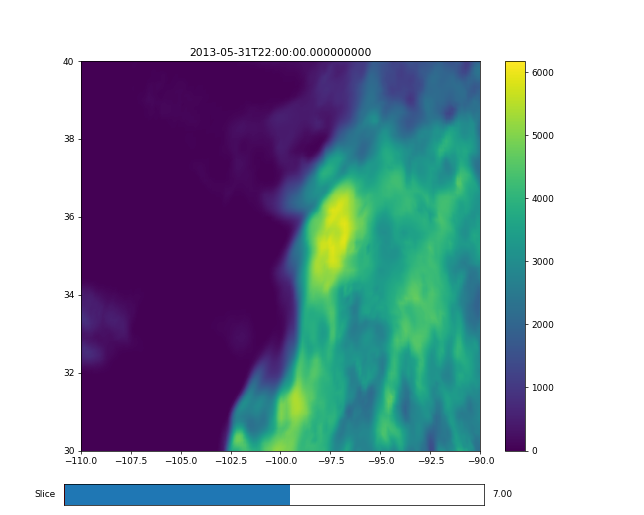

In [14]:
%matplotlib notebook

ex = animate_wxblocks(tms2.blocks, 'cape0')
ex.show()

In [2]:
wxvars = ['SBCAPE', 'MLCAPE', 'MUCAPE', '0-1 km SRH', '0-3 km SRH']

In [17]:
gribname = obmenu.menuselect(datetime = datetime(2018,4,13,18))
grib = pygrib.open(folder + gribname )

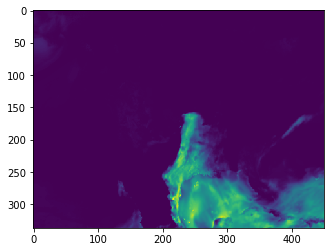

In [21]:
%matplotlib inline

plt.imshow(np.flip(grib.select(shortName='cape', level=0)[0].values, axis=0) )